In [150]:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error, r2_score
import time
import pandas as pd
import lightgbm as lgb
import xgboost as xgb
import numpy as np



In [151]:
df = pd.read_csv('SAdata_allMeasures.csv')

print(df.isnull().sum())

y = df['Y']
X = df.drop(columns=['Y'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
df.head()

age                      0
gender                   0
yearDriving              0
drivingFrequency         0
temp_length              0
temp_decisiontime        0
temp_decision_made       0
temp_correct_decision    0
temp_danger              0
temp_difficulty          0
CarPlacedLeft            0
CarPlacedRight           0
numS                     0
sAmpMean                 0
sAmpStd                  0
sAmpMax                  0
numF                     0
fMean                    0
fStd                     0
fMax                     0
backMirror               0
leftMirror               0
rightMirror              0
road                     0
sky                      0
pupilChange              0
pupilMean                0
pupilStd                 0
Y                        0
dtype: int64
(843, 28)


,age,gender,yearDriving,drivingFrequency,temp_length,temp_decisiontime,temp_decision_made,temp_correct_decision,temp_danger,temp_difficulty,...,fMax,backMirror,leftMirror,rightMirror,road,sky,pupilChange,pupilMean,pupilStd,Y
0,26,1,20,1,12,4.80219,4,2,20,89,...,874.5,0,5,3,24,0,0.733955,3.818149,0.169227,0.641219
1,26,1,20,1,6,4.91667,1,2,10,99,...,1014.0,2,2,1,9,2,0.623622,3.743575,0.178412,0.354868
2,26,1,20,1,1,2.21716,2,2,99,99,...,259.5,0,0,0,3,0,0.205836,3.326857,0.079828,0.561225
3,26,1,20,1,3,2.63056,1,2,9,79,...,636.0,0,1,0,6,0,0.020505,3.643468,0.034005,0.422067
4,26,1,20,1,9,2.42632,1,2,9,96,...,807.0,5,4,1,13,0,0.632357,3.669544,0.196699,0.533333


## Preprocessing

Since many features have different 

In [152]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)



## Baseline LR

In [153]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

linear_predictions = linear_model.predict(X_test)

linear_mse = mean_squared_error(y_test, linear_predictions)
print("Linear Regression Mean Squared Error:", linear_mse)

linear_r2 = r2_score(y_test, linear_predictions)
print("Linear Regression R-squared:", linear_r2)

Linear Regression Mean Squared Error: 0.013088468386775005
Linear Regression R-squared: 0.22664746493344456


## XGB

[0]	train-rmse:0.13269	train-mae:0.10864	test-rmse:0.13291	test-mae:0.10901
[1]	train-rmse:0.13037	train-mae:0.10658	test-rmse:0.13090	test-mae:0.10705
[2]	train-rmse:0.12842	train-mae:0.10481	test-rmse:0.12908	test-mae:0.10537
[3]	train-rmse:0.12659	train-mae:0.10314	test-rmse:0.12762	test-mae:0.10404
[4]	train-rmse:0.12512	train-mae:0.10179	test-rmse:0.12636	test-mae:0.10276
[5]	train-rmse:0.12373	train-mae:0.10047	test-rmse:0.12521	test-mae:0.10163
[6]	train-rmse:0.12248	train-mae:0.09927	test-rmse:0.12398	test-mae:0.10049
[7]	train-rmse:0.12142	train-mae:0.09823	test-rmse:0.12303	test-mae:0.09963
[8]	train-rmse:0.12046	train-mae:0.09728	test-rmse:0.12224	test-mae:0.09888
[9]	train-rmse:0.11951	train-mae:0.09635	test-rmse:0.12166	test-mae:0.09829
[10]	train-rmse:0.11866	train-mae:0.09550	test-rmse:0.12098	test-mae:0.09760
[11]	train-rmse:0.11782	train-mae:0.09473	test-rmse:0.12041	test-mae:0.09707
[12]	train-rmse:0.11703	train-mae:0.09401	test-rmse:0.11969	test-mae:0.09636
[13]	trai

<Axes: >

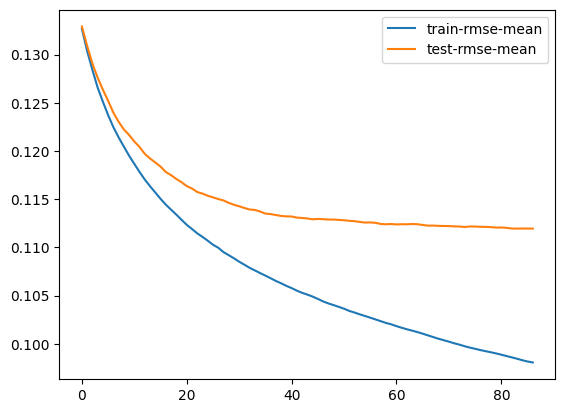

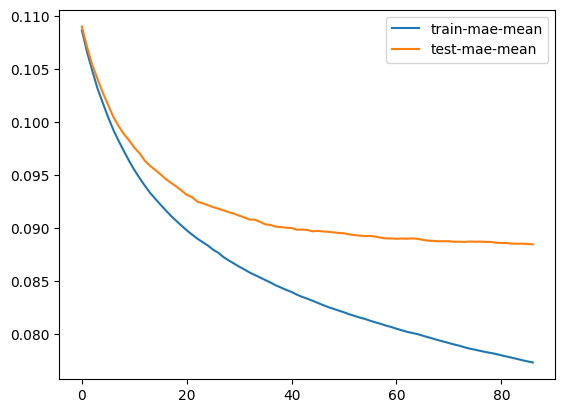

In [ ]:
#https://stackoverflow.com/questions/68766331/how-to-apply-predict-to-xgboost-cross-validation
#https://xgboost.readthedocs.io/en/latest/python/examples/cross_validation.html

dtrain = xgb.DMatrix(X, label=y) #https://stackoverflow.com/questions/70127049/what-is-the-use-of-dmatrix

params = {
    "max_depth": 2, 
    "eta": 0.1,
    "objective": "reg:squarederror"
}

start_time = time.time()

results = xgb.cv(
    params,
    dtrain,
    num_boost_round=100,
    nfold=5,
    metrics=['rmse', 'mae'],
    early_stopping_rounds=10,
    callbacks=[xgb.callback.EvaluationMonitor()], #https://xgboosting.com/how-to-use-xgboost-evaluationmonitor-callback/
    seed=42
)

print(f"\nTraining time: {time.time() - start_time:.2f} seconds")
print("\nFinal Results:")
print(f"RMSE: {results['test-rmse-mean'].iloc[-1]:.4f} ± {results['test-rmse-std'].iloc[-1]:.4f}")
print(f"MAE: {results['test-mae-mean'].iloc[-1]:.4f} ± {results['test-mae-std'].iloc[-1]:.4f}")

#plot rmse against number of rounds describe the axis
results[['train-rmse-mean', 'test-rmse-mean']].plot()
results[['train-mae-mean', 'test-mae-mean']].plot()




# LGB

In [190]:
# Add timing and evaluation for LightGBM
start_time_lgb = time.time()
'''
    max_depth=2, # Decreasing it made the rmse lower
    min_data_in_leaf=3,  # https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
'''
params = {
    'objective': 'regression',
    'metric': ['rmse', 'mae'],
    'learning_rate': 0.1,
}

train_data = lgb.Dataset(X, label=y)

#https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.early_stopping.htmlxw
#https://stackoverflow.com/questions/49774825/how-to-use-lightgbm-cv-for-regression

# Store evaluation history
evals_result = {}
record_eval = lgb.record_evaluation(evals_result)

cv_results = lgb.cv(
    params,
    train_data,
    num_boost_round=100,
    nfold=5,
    callbacks=[record_eval],
    stratified=False, 
    eval_train_metric=True, 
    seed=42
)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2917
[LightGBM] [Info] Number of data points in the train set: 840, number of used features: 28
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000607 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2917
[LightGBM] [Info] Number of data points in the train set: 840, number of used features: 28
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2917
[LightGBM] [Info] Number of data points in the train set: 840, number of used features: 28
[LightGBM] 

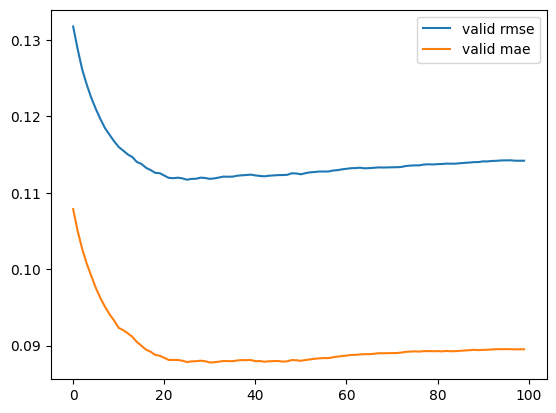

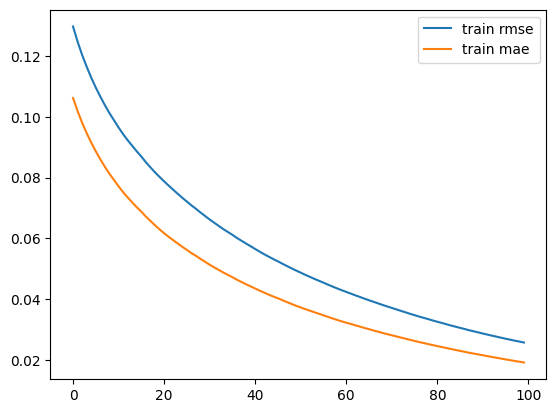

In [194]:
valid_rmse = evals_result['valid']['rmse-mean']
valid_mae = evals_result['valid']['l1-mean']

train_rmse = evals_result['train']['rmse-mean']
train_mae = evals_result['train']['l1-mean']

plt.plot(valid_rmse, label='valid rmse')
plt.plot(valid_mae, label='valid mae')

plt.legend()
plt.show()

plt.plot(train_rmse, label='train rmse')
plt.plot(train_mae, label='train mae')

plt.legend()
plt.show()




## REPORT

In [157]:
import matplotlib.pyplot as plt

In [158]:
performance_df = pd.DataFrame({
    'Model': ['XGBoost', 'LightGBM'],
    'RMSE': [xgb_rmse, lgb_rmse],
    'MAE': [xgb_mae, lgb_mae],
    'R²': [xgb_r2, lgb_r2],
    'Training Time (s)': [xgb_training_time, lgb_training_time],
    'Prediction Time (s)': [xgb_prediction_time, lgb_prediction_time]
})


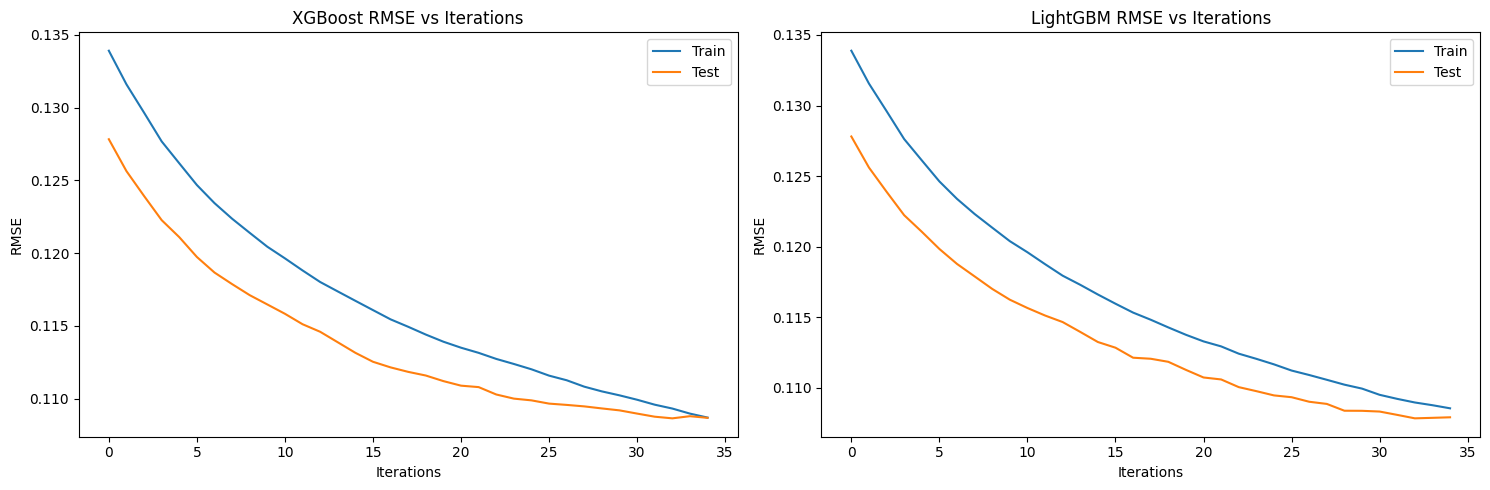


Model Performance Comparison:
   Model     RMSE     MAE       R²  Training Time (s)  Prediction Time (s)
 XGBoost 0.108658 0.08769 0.302394           0.112003             0.001079
LightGBM 0.107844 0.08715 0.312798           0.031106             0.000801


In [177]:

plt.figure(figsize=(15, 5))

# XGBoost training progress
plt.subplot(1, 2, 1)
results_xgb = model_xgb.evals_result()
epochs_xgb = len(results_xgb['validation_0']['rmse'])
x_axis_xgb = range(epochs_xgb)
plt.plot(x_axis_xgb, results_xgb['validation_0']['rmse'], label='Train')
plt.plot(x_axis_xgb, results_xgb['validation_1']['rmse'], label='Test')
plt.legend()
plt.title('XGBoost RMSE vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('RMSE')

# LightGBM training progress
plt.subplot(1, 2, 2)
results_lgb = model_lgb.evals_result_
epochs_lgb = len(results_lgb['training']['l2'])
x_axis_lgb = range(epochs_lgb)
plt.plot(x_axis_lgb, np.sqrt(results_lgb['training']['l2']), label='Train')
plt.plot(x_axis_lgb, np.sqrt(results_lgb['valid_1']['l2']), label='Test')
plt.legend()
plt.title('LightGBM RMSE vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('RMSE')

plt.tight_layout()
plt.show()

# Print performance table
print("\nModel Performance Comparison:")
print(performance_df.to_string(index=False))


#https://pyimagesearch.com/2019/10/14/why-is-my-validation-loss-lower-than-my-training-loss/

[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is set=3, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=3
[LightGBM] [Warning] min_data_in_leaf is

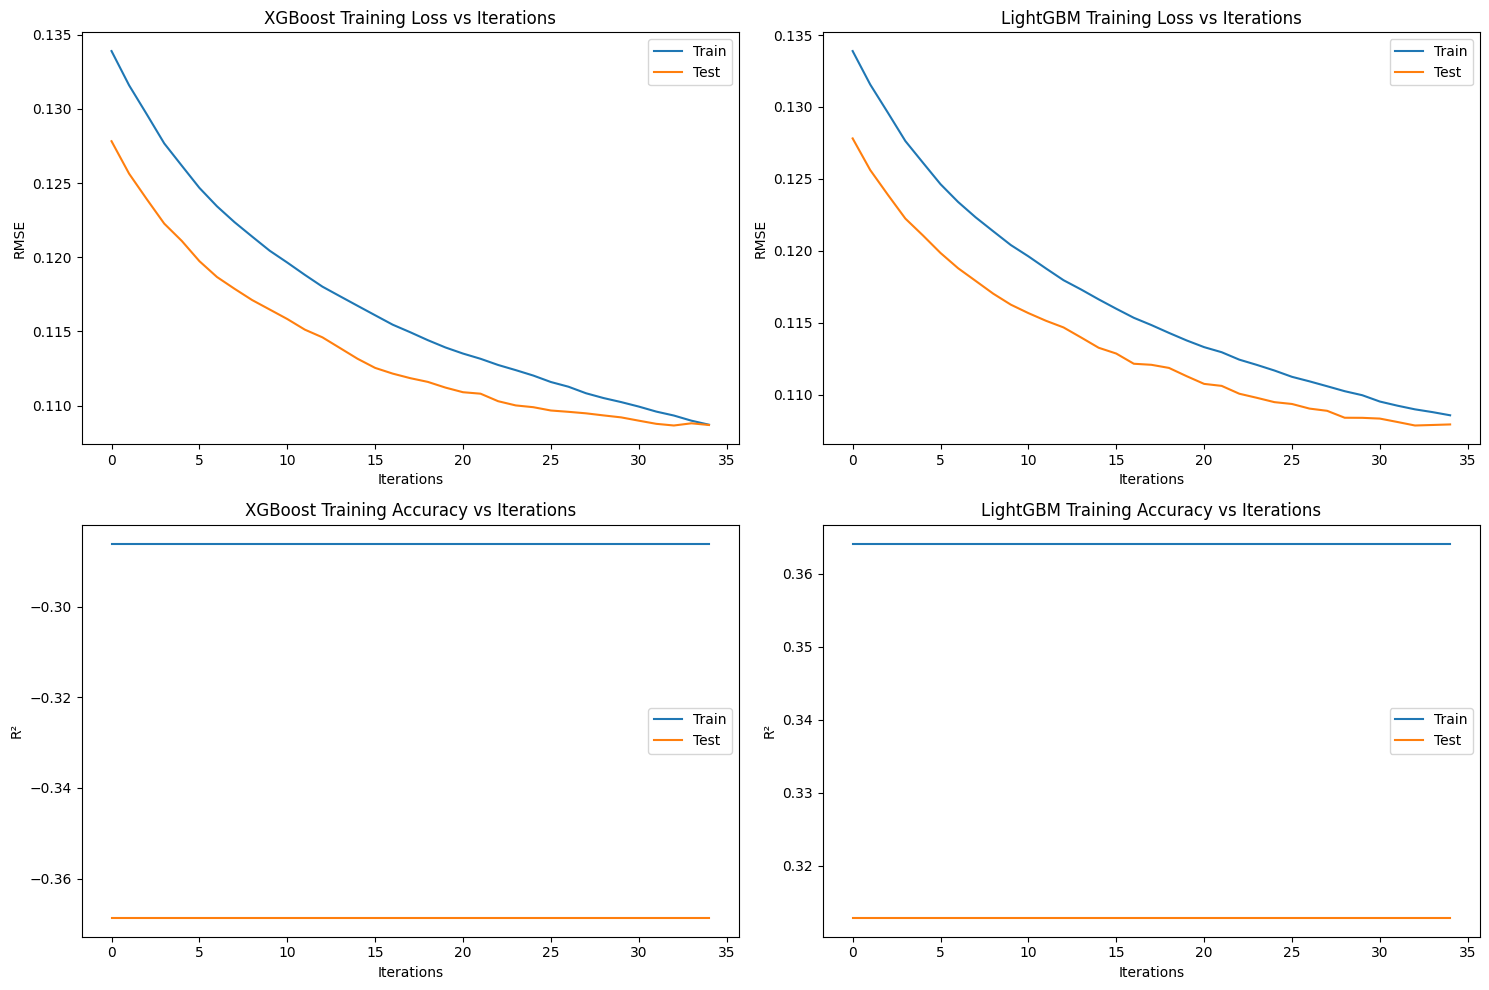

In [160]:
plt.figure(figsize=(15, 10))

# XGBoost training loss
plt.subplot(2, 2, 1)
plt.plot(x_axis_xgb, results_xgb['validation_0']['rmse'], label='Train')
plt.plot(x_axis_xgb, results_xgb['validation_1']['rmse'], label='Test')
plt.legend()
plt.title('XGBoost Training Loss vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('RMSE')

# LightGBM training loss
plt.subplot(2, 2, 2)
plt.plot(x_axis_lgb, np.sqrt(results_lgb['training']['l2']), label='Train')
plt.plot(x_axis_lgb, np.sqrt(results_lgb['valid_1']['l2']), label='Test')
plt.legend()
plt.title('LightGBM Training Loss vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('RMSE')

# XGBoost training accuracy (R²)
plt.subplot(2, 2, 3)
plt.plot(x_axis_xgb, [r2_score(y_train, model_xgb.predict(X_train)) for _ in x_axis_xgb], label='Train')
plt.plot(x_axis_xgb, [r2_score(y_test, model_xgb.predict(X_test)) for _ in x_axis_xgb], label='Test')
plt.legend()
plt.title('XGBoost Training Accuracy vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('R²')

# LightGBM training accuracy (R²)
plt.subplot(2, 2, 4)
plt.plot(x_axis_lgb, [r2_score(y_train, model_lgb.predict(X_train)) for _ in x_axis_lgb], label='Train')
plt.plot(x_axis_lgb, [r2_score(y_test, model_lgb.predict(X_test)) for _ in x_axis_lgb], label='Test')
plt.legend()
plt.title('LightGBM Training Accuracy vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('R²')

plt.tight_layout()
plt.show()

In [ ]:
#LightGBM Distributed Learning
import dask.array as da
from distributed import Client, LocalCluster
import lightgbm as lgb

cluster = LocalCluster(n_workers=3)
client = Client(cluster)

dask_model = lgb.DaskLGBMRegressor()
dask_model.client = client

dask_model.fit(X_train, y_train)

dask_predictions = dask_model.predict(X_test)

dask_rmse = np.sqrt(mean_squared_error(y_test, dask_predictions))








/Users/karolhetman/Library/Python/3.9/lib/python/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 53061 instead
  warnings.warn(
/Users/karolhetman/Library/Python/3.9/lib/python/site-packages/lightgbm/dask.py:549: UserWarning: Parameter n_jobs will be ignored.
  _log_warning(f"Parameter {param_alias} will be ignored.")


AttributeError: 'DataFrame' object has no attribute 'to_delayed'

2024-11-29 17:02:38,049 - tornado.application - ERROR - Exception in callback <bound method SystemMonitor.update of <SystemMonitor: cpu: 36 memory: 298 MB fds: 741>>
Traceback (most recent call last):
  File "/Users/karolhetman/Library/Python/3.9/lib/python/site-packages/tornado/ioloop.py", line 937, in _run
    val = self.callback()
  File "/Users/karolhetman/Library/Python/3.9/lib/python/site-packages/distributed/system_monitor.py", line 168, in update
    net_ioc = psutil.net_io_counters()
  File "/Users/karolhetman/Library/Python/3.9/lib/python/site-packages/psutil/__init__.py", line 2160, in net_io_counters
    rawdict = _psplatform.net_io_counters()
OSError: [Errno 12] Cannot allocate memory


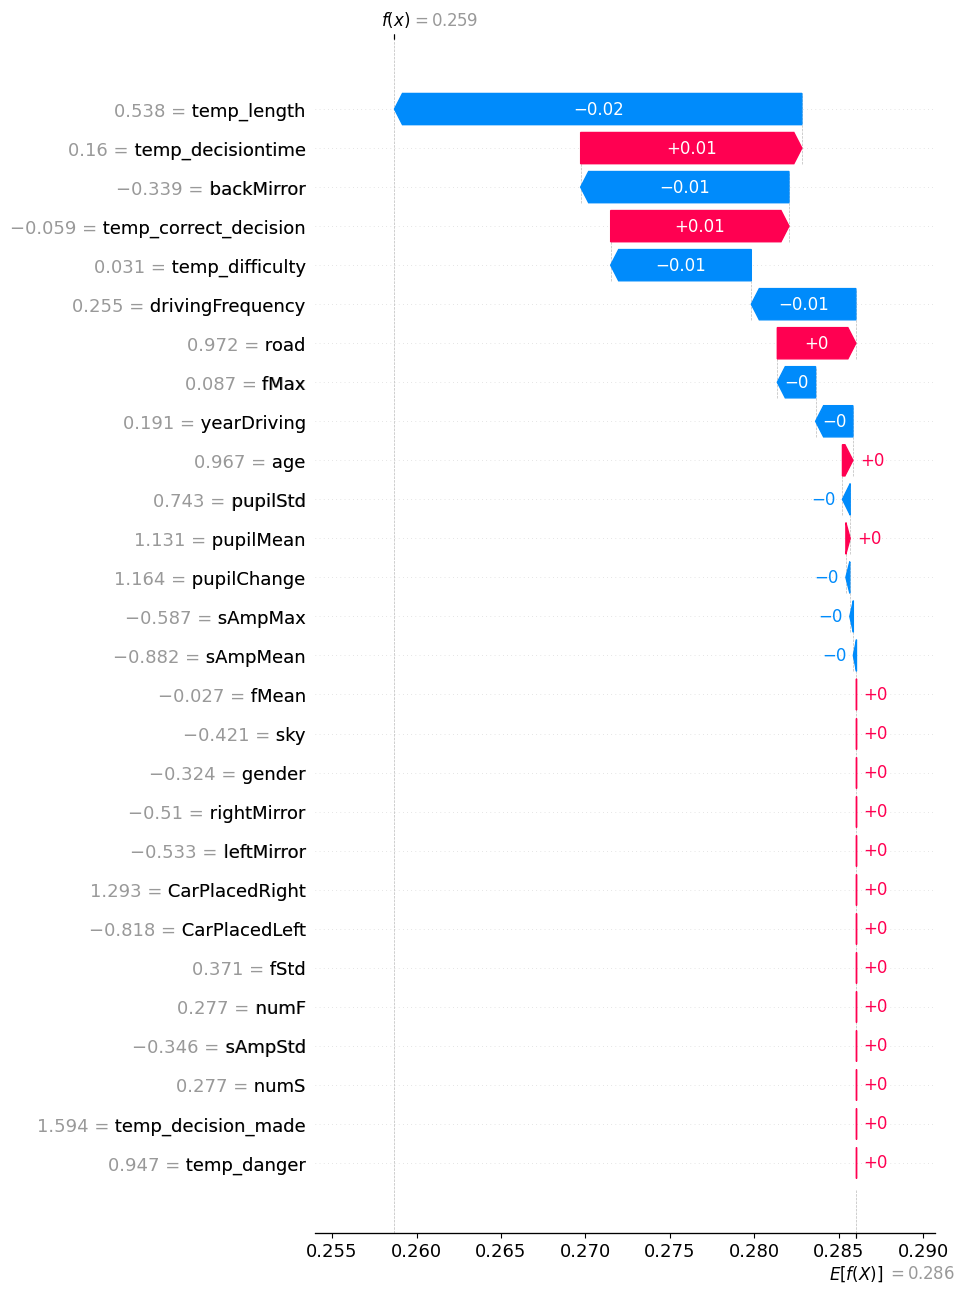

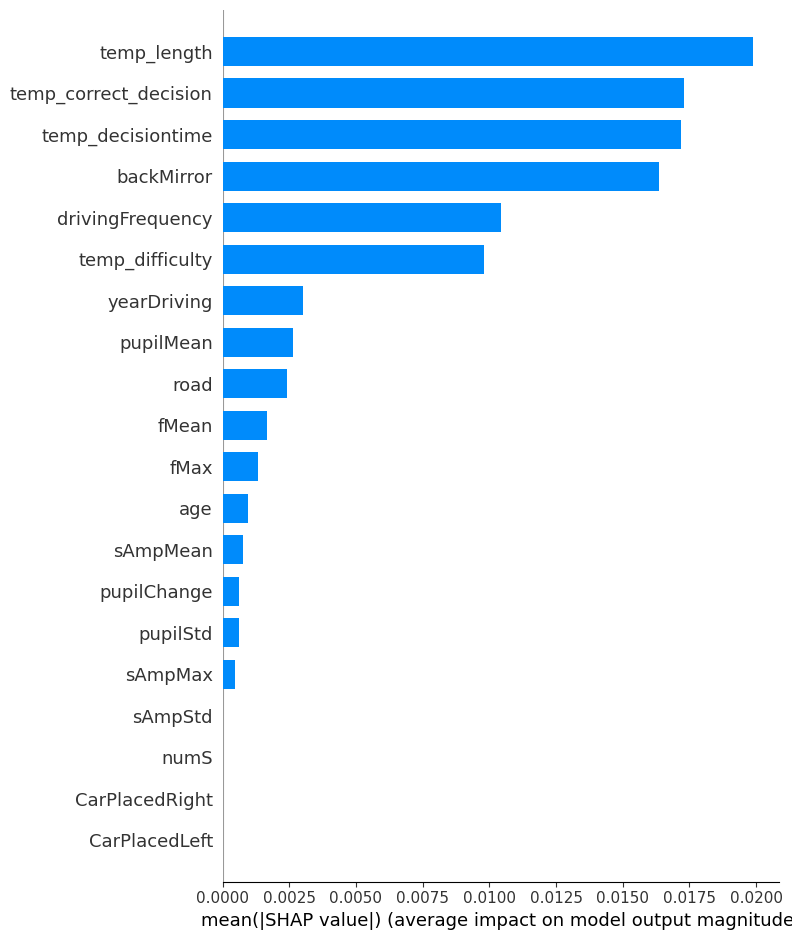

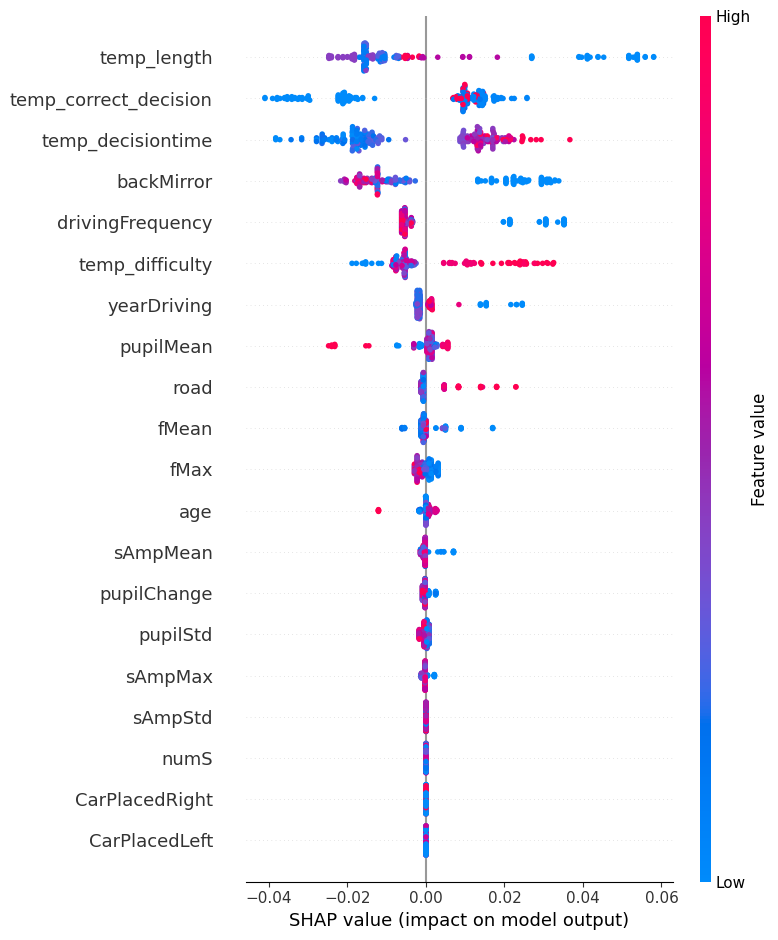

In [ ]:
#SHAP Analysis
import shap

shap.initjs()

explainer = shap.TreeExplainer(model_lgb)
shap_values = explainer.shap_values(X_test)
X_test_df = pd.DataFrame(X_test, columns=df.drop(columns=['Y']).columns) # Convert to DataFrame to display because scalar turns it into a numpy array
shap.waterfall_plot(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X_test_df.iloc[0]), max_display=30)
shap.plots.force(explainer.expected_value, shap_values[0], X_test_df.iloc[0])
shap.plots.force(explainer.expected_value, shap_values[:100], X_test_df.iloc[:100])

shap.summary_plot(shap_values, X_test_df, plot_type='bar')
shap.summary_plot(shap_values, X_test_df)


In [ ]:
X_test_df = pd.DataFrame(X_test, columns=df.drop(columns=['Y']).columns) # Convert to DataFrame to use iloc
shap.plots.force(explainer.expected_value, shap_values[:100], X_test_df.iloc[:100])
#export the plot
shap.save_html('shap_plot.html', shap.force_plot(explainer.expected_value, shap_values[:100], X_test_df.iloc[:100]))

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[:100], X_test_df.iloc[:100], matplotlib=True, show=False)
plt.savefig('shap_force_plot_multi.png', bbox_inches='tight', dpi=300)
plt.close()


NotImplementedError: matplotlib = True is not yet supported for force plots with multiple samples!